<a href="https://colab.research.google.com/github/BuddhikaRoshan/DL-Lab02-IT22564122/blob/main/ex03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [9 2 9 6 0 9 9 3 6 5]


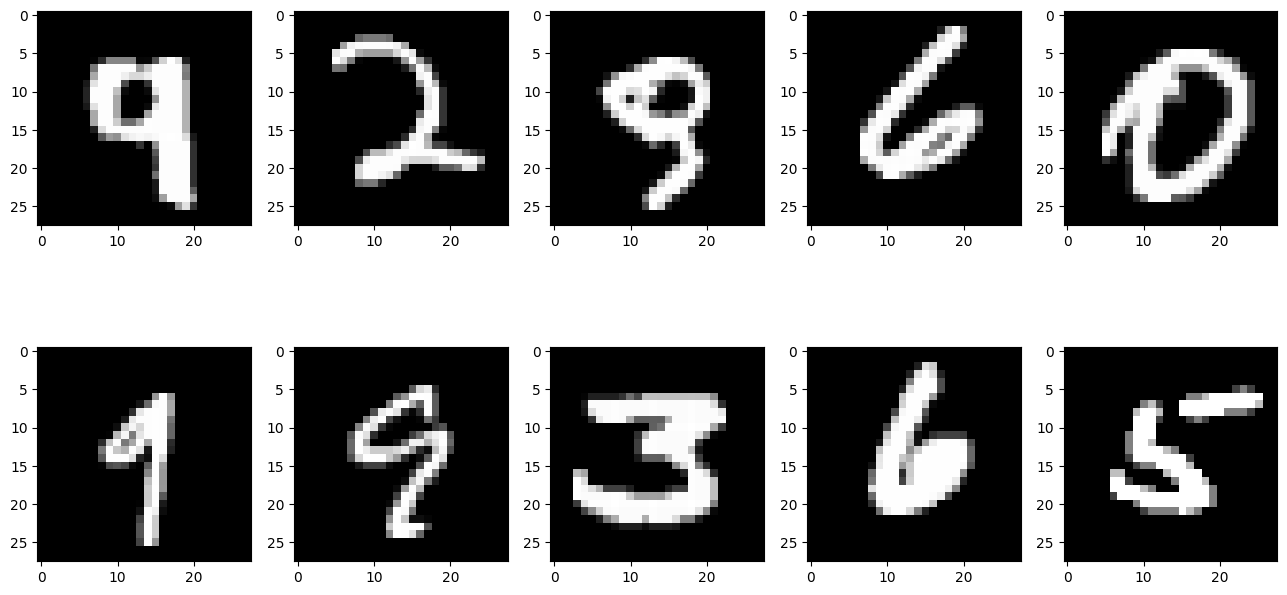

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8446 - loss: 0.5141
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9611 - loss: 0.1299
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9721 - loss: 0.0920
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9767 - loss: 0.0744
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9810 - loss: 0.0588
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9846 - loss: 0.0478
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9865 - loss: 0.0410
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9882 - loss: 0.0360
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9905 - loss: 0.0292
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9907 - loss: 0.0272


Plot the loss and accuracy graphs

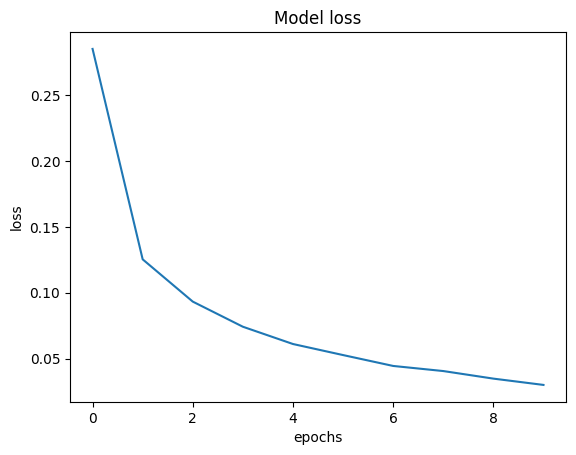

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

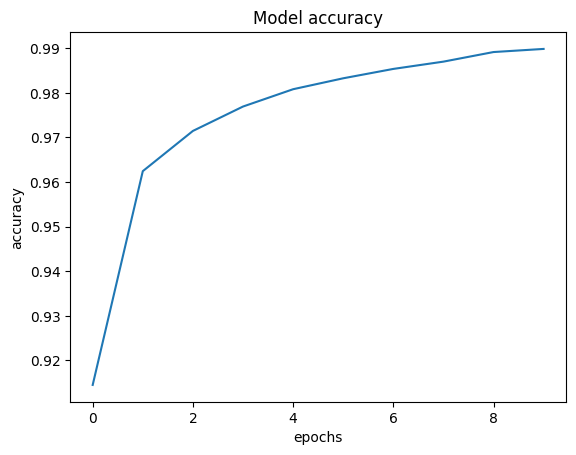

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9678 - loss: 0.1181
Loss of the Test dataset is: 0.1016189232468605
Accuracy of the test dataset is: 0.9728999733924866


Save the model weights

In [ ]:
#model.save_weights('MNIST_WEIGHTS_V1.h5')


# **LAB_02 Task 03**

Run the MLP_with_MNIST_dataset.ipynb using Jupyter notebook (or google colab) and see if

you can understand the code.  

**a.** Improve the test accuracy of the model by changing the hyperparameters.

**b.** Add L1 and L2 regularization terms to the model and retrain the model.

**c.** Visualize class-wise test dataset performance using a confusion matrix.

In [ ]:
# Define the model
# a. Improve the test accuracy of the model by changing the hyperparameters.
# A higher number of neurons (128) increases the model's capacity to learn.
# The Dropout layer is a key hyperparameter that prevents overfitting, improving generalization.

# b. Add L1 and L2 regularization terms to the model and retrain the model.
# L1 and L2 regularization are added to the first Dense layer to prevent overfitting.
# They add a penalty to the loss function, encouraging smaller weights for better generalization.

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
print("Training the model...")
history = model.fit(new_train_data, new_train_target,
                    epochs=10,
                    batch_size=33,
                    validation_split=0.1)

Training the model...
Epoch 1/10
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9653 - loss: 0.2772 - val_accuracy: 0.9705 - val_loss: 0.2668
Epoch 2/10
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9662 - loss: 0.2749 - val_accuracy: 0.9687 - val_loss: 0.2723
Epoch 3/10
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9677 - loss: 0.2706 - val_accuracy: 0.9733 - val_loss: 0.2684
Epoch 4/10
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9655 - loss: 0.2796 - val_accuracy: 0.9712 - val_loss: 0.2765
Epoch 5/10
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9655 - loss: 0.2780 - val_accuracy: 0.9705 - val_loss: 0.2700
Epoch 6/10
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9678 - loss: 0.2718 - val_accuracy: 0.9693 - val_loss: 0.2689
Epoch 7/10
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9651 - loss: 0.2788 - val_accuracy: 0.9690 - val_loss: 0.2686
Epoch 8/10
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accurac

In [ ]:
# Evaluate the model on the test data
print("\nEvaluating the model on the test data...")
test_loss, test_accuracy = model.evaluate(new_test_data, new_test_target, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")


Evaluating the model on the test data...
313/313 - 1s - 3ms/step - accuracy: 0.9697 - loss: 0.2612

Test Accuracy: 96.97%


In [ ]:
# CORRECT LINE: Use the original test_target for true labels
y_true_labels = test_target

In [ ]:
# Get the model's predictions on the test data
y_pred_probs = model.predict(new_test_data)
# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# Generate the confusion matrix using true labels and predicted labels
cm = confusion_matrix(y_true_labels, y_pred_classes)

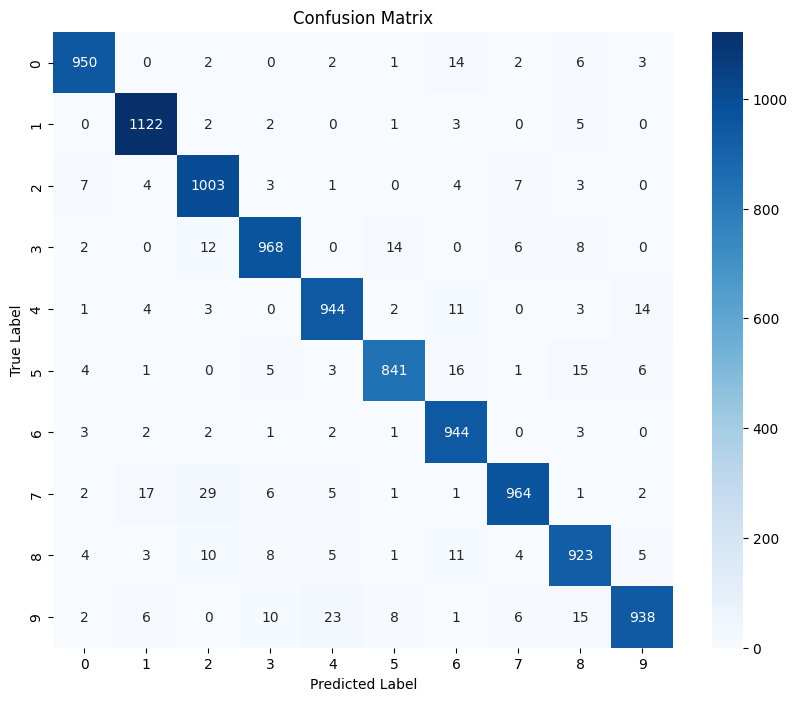

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()